In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.multiclass import OneVsRestClassifier
import joblib
import pandas as pd
from mlxtend.plotting import plot_decision_regions
import warnings

warnings.filterwarnings("ignore")

# Load required libraries

# Load data

In [20]:
# Load iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# You should do:
- EDA
- Visualize your data

Skiping in this example given how simple the dataset is and how familizaried we are with it.

# Split the dataset

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# You should do:
- Data pre-processing
- Feature engineering

Skiping in this example given how simple the dataset is and how familizaried we are with it.

# Model Selection (Kernel Selection) using Cross-validation

In [22]:
# Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
cv_scores = []
for k in kernels:
    svc = SVC(kernel=k)
    scores = cross_val_score(svc, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

optimal_kernel = kernels[cv_scores.index(max(cv_scores))]
print(f"Optimal kernel is {optimal_kernel} with cross-validation score of {max(cv_scores)}")

Optimal kernel is poly with cross-validation score of 0.9714285714285715


# Hyperparameter tuning using GridSearchCV

In [23]:
params = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': [optimal_kernel],
    'decision_function_shape': ['ovo', 'ovr']
}

grid = GridSearchCV(SVC(), params, refit=True, verbose=2, cv=5)
grid.fit(X_train, y_train)
print(f"Best parameters found: {grid.best_params_}")

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END C=0.1, decision_function_shape=ovo, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=0.1, decision_function_shape=ovo, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=0.1, decision_function_shape=ovo, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=0.1, decision_function_shape=ovo, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=0.1, decision_function_shape=ovo, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=0.1, decision_function_shape=ovo, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END C=0.1, decision_function_shape=ovo, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END C=0.1, decision_function_shape=ovo, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END C=0.1, decision_function_shape=ovo, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END C=0.1, decision_function_shape=ovo, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END C=0.1, decision_function_shape=ovo, gamma=0.01, kernel=poly

# Using best estimator for predictions

In [24]:
clf = grid.best_estimator_

In [25]:
clf

SVC(C=0.1, decision_function_shape='ovo', gamma=0.1, kernel='poly')

In [26]:
y_pred = clf.predict(X_test)

# Model Evaluation

In [27]:
print("One-vs-One Classification Report:\n", classification_report(y_test, y_pred))

One-vs-One Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


# Save the best model

In [28]:
joblib.dump(clf, 'svm_model.pkl')

['svm_model.pkl']

# Create a function for predictions

In [29]:
def predict_flower(sample):
    model = joblib.load('svm_model.pkl')
    prediction = model.predict([sample])
    return iris.target_names[prediction[0]]

# Testing the function

In [30]:
sample = [5.1, 3.5, 1.4, 0.2]  # example data
print(f"Predicted flower class: {predict_flower(sample)}")

Predicted flower class: setosa


# SVM Visualization (works best for 2D data, will only show for 2 features for simplicity)

Model interpretation

In [31]:
X_train_plot = X_train[:, :2] # Use only the first two features for easier plotting
X_test_plot = X_test[:, :2] # Use only the first two features for easier plotting
clf.fit(X_train_plot, y_train)

SVC(C=0.1, decision_function_shape='ovo', gamma=0.1, kernel='poly')

In [32]:
X_test_plot = pd.DataFrame(X_test_plot, columns=['sepal length (cm)', 'sepal width (cm)'])

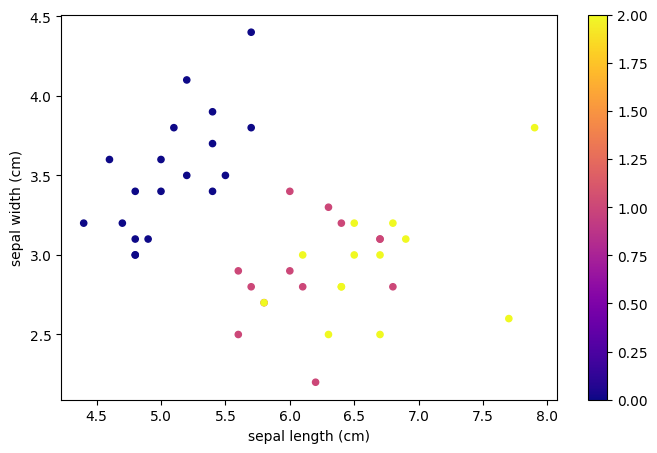

In [33]:
X_test_plot.plot.scatter(x='sepal length (cm)',
                         y='sepal width (cm)',
                         c=y_test,
                         colormap='plasma', figsize=(8,5));

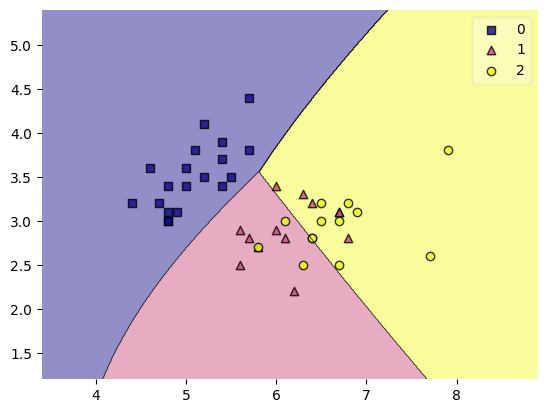

In [34]:
plot_decision_regions(X=X_test_plot.values,
                      y=y_test,
                      clf=clf,
                      colors='#0D0887,#CC4778,#F0F921');